In [1]:
import numpy as np
import random
from random import randint
import time
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
global n,d
n = 5000#39861#1500
d = 28102#12419

In [3]:
def searchtime(matrix,flag):
    nearestneighbours = []
    start = time.time()
    for i in range(matrix.shape[0]):
        if(flag == True):
            js = getcosinesimilarity(matrix[i], matrix[15])
        else:
            js = getinteger(matrix[i], matrix[15])
                
       # if(js >= 0.8):
       #     nearestneighbours.append(i)
    end = time.time()
    search = end-start
    print(search)
    return search

In [4]:
def readdataset():
    dataset = np.loadtxt("../dataset/docword.enron.txt", dtype=int, usecols =(0,1), skiprows=3)    
    matrix = np.zeros([n,d])
    print (dataset.shape)
    total = dataset.shape[0]
    i=0
    while(1):
    #for i in range(n):
        if i==total:
            break
        x = dataset[i][0]
        y = dataset[i][1]
        #print(x)
        if x>=n+1:
            break
        matrix[x-1][y-1] = 1
        i+=1
    print(i)
    return matrix

In [5]:
def convertocompact(matrix):
    compact = []
    for i in range(matrix.shape[0]):
        current = []
        for j in range(matrix.shape[1]):
            if(matrix[i][j]==1):
                current.append(j)
        compact.append(current)
    return compact

In [6]:
def getcosinesimilarity(a, b):
    hammingdistance = np.count_nonzero(a!=b)
    R = 1 - (hammingdistance/len(a))  # length of a and b is equal
    cs = (2*R)/(R+1)
    return cs

In [7]:
def getinteger(a, b):
    innerproduct = np.inner(a,b)
    a1 = np.count_nonzero(a)
    b1 = np.count_nonzero(b)
    if a1==0 or b1==0:
        cs=1
    else:
        cs = innerproduct/(np.sqrt(a1)*np.sqrt(b1))
    return cs

In [8]:
def ourtransform(reduceddim, matrix, n, d):
    start = time.time()
    sigmatrix = np.zeros([n,reduceddim])
    for i in range (reduceddim):
        perm = np.random.permutation(d)
        for j in range(n):
            vector = matrix[j]
            l = []
            for k in vector:
                l.append(perm[k])
            if(len(l)>0):
                sigmatrix[j][i] = min(l)
    end = time.time()
    totaltime = end - start
    print(totaltime)
    timeforour.append(totaltime)
    return sigmatrix

In [9]:
def getpairsets(matrix, num ,flag):
    set01 = set([])
    set02 = set([])
    set03 = set([])
    set04 = set([])
    set05 = set([])
    set06 = set([])
    set07 = set([])
    set08 = set([])
    set09 = set([])
    
    vector = matrix[num]
    j = num
    for i in range(500,5000):
        if(flag==True):
            hdistance = getcosinesimilarity(vector, matrix[i])
            #print(hdistance)
        else:
            hdistance = getinteger(vector, matrix[i])

            
        if(hdistance >= 0.9):
            set09.add((i,j))
        if(hdistance >= 0.8):
            set08.add((i,j))
        if(hdistance >= 0.7):
            set07.add((i,j))
        if(hdistance >= 0.6):
            set06.add((i,j))
        if(hdistance >= 0.5):
            set05.add((i,j))
        if(hdistance >= 0.4):
            set04.add((i,j))
        if(hdistance >= 0.3):
            set03.add((i,j))
        if(hdistance >= 0.2):
            set02.add((i,j))
        if(hdistance >= 0.1):
            set01.add((i,j))
            #print("inset1")
    return set01,set02,set03,set04,set05,set06,set07,set08,set09
    

In [10]:
def calculateaccuracy(vec, matrix, compressedmatrix, flag):
    
    accuracy = []
    
    oset1,oset2,oset3,oset4,oset5,oset6,oset7,oset8,oset9 = getpairsets(matrix, vec, False)
    cset1,cset2,cset3,cset4,cset5,cset6,cset7,cset8,cset9 = getpairsets(compressedmatrix, vec, True)
    
    intersection1 = len(oset1.intersection(cset1))
    #print(intersection1)
    intersection2 = len(oset2.intersection(cset2))
    intersection3 = len(oset3.intersection(cset3))
    intersection4 = len(oset4.intersection(cset4))
    intersection5 = len(oset5.intersection(cset5))
    intersection6 = len(oset6.intersection(cset6))
    intersection7 = len(oset7.intersection(cset7))
    intersection8 = len(oset8.intersection(cset8))
    intersection9 = len(oset9.intersection(cset9))
    
    union1 = len(oset1.union(cset1))
    #print(union1)
    union2 = len(oset2.union(cset2))
    union3 = len(oset3.union(cset3))
    union4 = len(oset4.union(cset4))
    union5 = len(oset5.union(cset5))
    union6 = len(oset6.union(cset6))
    union7 = len(oset7.union(cset7))
    union8 = len(oset8.union(cset8))
    union9 = len(oset9.union(cset9))
    
        
    if(union1==0):
        accuracy1 = 1
        #print("GONE")
    else:
        accuracy1 = intersection1/union1
        #print("accuracy1")
        
    if(union2==0):
        accuracy2 = 1
    else:
        accuracy2 = intersection2/union2
        
    if(union3==0):
        accuracy3 = 1
    else:
        accuracy3 = intersection3/union3
        
    if(union4==0):
        accuracy4 = 1
    else:
        accuracy4 = intersection4/union4
        
    if(union5==0):
        accuracy5 = 1
    else:
        accuracy5 = intersection5/union5
    if(union6==0):
        accuracy6 = 1
    else:
        accuracy6 = intersection6/union6
        
    if(union7==0):
        accuracy7 = 1
    else:
        accuracy7 = intersection7/union7
        
    if(union8==0):
        accuracy8 = 1
    else:
        accuracy8 = intersection8/union8
        
    if(union9==0):
        accuracy9 = 1
    else:
        accuracy9 = intersection9/union9
        
        
    accuracy.append(accuracy1)
    accuracy.append(accuracy2)
    accuracy.append(accuracy3)
    accuracy.append(accuracy4)
    accuracy.append(accuracy5)
    accuracy.append(accuracy6)
    accuracy.append(accuracy7)
    accuracy.append(accuracy8)
    accuracy.append(accuracy9)
    
    return accuracy


In [11]:
dimsaftercompression = [50, 100, 500, 1000, 1500, 2000,3000,3500,4000,5000]

In [12]:
def getalldataour(matrix):
    
    dimaccuracy = np.zeros([9,500])
    mean = []
    compactmatrix = convertocompact(matrix)
    
    for i in dimsaftercompression:
        searchaccuracy = []
        accuracyour = []
        compressedmatrix = ourtransform(i, compactmatrix, matrix.shape[0], matrix.shape[1])
        #search.append(searchtime(compressedmatrix, True))

        for j in range(500):
            searchaccuracy.append(calculateaccuracy(compressedmatrix=compressedmatrix,flag=True,vec=j,matrix=matrix))
            
            
        print(len(searchaccuracy))
        
        
        for k in range(500):
            sa = searchaccuracy[k]
            for l in range(9):
                dimaccuracy[l][k] = sa[l]
                
        x = np.mean(dimaccuracy, axis = 1)
        mean.append(x)
        
    accuracymatrix = np.zeros([9,10])
    for i in range(10):
        vector = mean[i]
        for j in range(9):
            accuracymatrix[j][i] = vector[j]
    return accuracymatrix
        
        
        

In [13]:
def plotaccuracy(accuracy):    
    setof = [0.1,0.2,.3,0.4,0.5,0.6,0.7,0.8,0.9]
    plt.figure(figsize=(3,3))
    for i in range(accuracy.shape[0]):
        plt.plot(dimsaftercompression, accuracy[i], label = setof[i] )
    #plt.grid(b=True, which='major')
    
    plt.xticks([0,100,500,1000,2000])
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10)
    plt.xlabel('Compression Length')
    plt.ylabel('Accuracy')
    plt.legend(prop={'size':8},loc = 4)
    plt.savefig('Accuracy Vs Compression Length.jpg', bbox_inches='tight')
    plt.show()

In [14]:
def plotcompressiontime(timetaken):    
    plt.figure(figsize=(3,3))
    plt.plot(dimsaftercompression, timetaken)
    #plt.grid(b=True, which='major')
    #plt.xticks(dimsaftercompression)
    #plt.xticks([0,2000,4000,6000,8000,10000])
    #plt.yticks([0,1,2,3,4,5,6,7,8])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10) 
    plt.xlabel('Compression Length')
    plt.ylabel('Compression Time (s)')
    plt.savefig('Compression Time Vs Compression Length.jpg', bbox_inches='tight')
    
    plt.show()

In [15]:
def plotsearchtime(timetaken):    
    plt.figure(figsize=(3,3))
    plt.plot(dimsaftercompression, timetaken)
    #plt.grid(b=True, which='major')
    #plt.xticks(dimsaftercompression)
    #plt.xticks([0,2000,4000,6000,8000,10000])
    #plt.yticks([0,1,2,3,4,5,6,7,8])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10) 
    plt.xlabel('Compression Length')
    plt.ylabel('Search Time (s)')
    plt.savefig('Search Time Vs Compression Length.jpg', bbox_inches='tight')
    
    plt.show()

In [16]:
#os.chdir("/content/")
print (os.getcwd())
matrix = readdataset()

/home/reckonsys/CODS_Final/ENRON_Local/MinHash
(3710420, 2)
364349


In [17]:

timeforour = []
search = []
thisis = getalldataour(matrix)


5.274096727371216
500
9.291224002838135
500
44.44353461265564
500
90.03681826591492
500
130.3048231601715
500
176.87857294082642
500
265.89260244369507
500
317.98441767692566
500
303.7080776691437
500
374.9461250305176
500


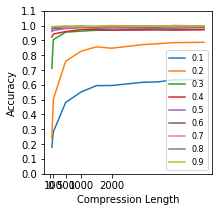

In [18]:
plotaccuracy(thisis)

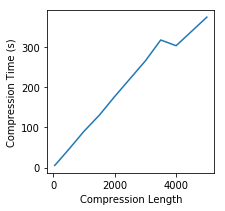

In [19]:
plotcompressiontime(timeforour)

In [20]:
#plotsearchtime(search)

In [21]:
#s=np.asarray(search)
t=np.asarray(timeforour)

In [22]:
np.save("thisis.npy",thisis)
#np.save("search.npy",s)
np.save("compression.npy",t)

In [23]:
print (thisis)

[[0.17960621 0.28313373 0.48104234 0.55133188 0.59466223 0.59566003
  0.61701582 0.61994401 0.63355431 0.63688691]
 [0.23826525 0.50332874 0.75939709 0.82678515 0.85627574 0.84703742
  0.87123225 0.87749547 0.8844889  0.88701009]
 [0.71117219 0.90526465 0.95514483 0.96229008 0.96821678 0.96870047
  0.97513297 0.97032796 0.97188978 0.97315623]
 [0.92283275 0.94267715 0.95943355 0.9728139  0.97322583 0.96987605
  0.96938626 0.9729148  0.96935593 0.97218111]
 [0.96011907 0.96659638 0.97962032 0.98581024 0.98137878 0.98376701
  0.98226257 0.9795618  0.98197678 0.98591471]
 [0.97330604 0.98017201 0.98420604 0.98861008 0.98956809 0.98890142
  0.9876     0.98923475 0.99093333 0.98940142]
 [0.97155152 0.98824444 0.98473475 0.99359347 0.99293333 0.99126667
  0.99240142 0.99501667 0.9916196  0.99393333]
 [0.98011732 0.9876     0.9941     0.9965     0.9925     0.9986
  0.9971     0.995      1.         0.998     ]
 [0.99211111 0.99377778 0.99727778 0.99327778 0.996      1.
  0.99577778 0.996      